# Team 12 - Project One - Census Data

Our goal is to conduct predictive analysis and determine if the income of a random adult American citizen is based on given features, such as age, education, occupation, gender, race, work week, native region, family status, etc. We want to predict when a person will earn more than or less than 50,0000 dollars a year.

## Step 1:  Clean and transform the input dataset

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

# Read the dataset
input_csv = pd.read_csv("adult.csv", delimiter=',', skipinitialspace=True)
input_csv.shape

(32561, 15)

In [2]:
# Display the input data for preview
input_csv.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# Check the number of unique records using groupby
csv_group = input_csv.groupby(["age", "workclass", "fnlwgt",
                               "education","education.num","marital.status", 
                               "occupation","relationship","race",
                               "sex", "capital.gain","capital.loss",
                               "hours.per.week","native.country","income"])
len(csv_group)

32537

In [4]:
# Get all the data for the duplicate rows
duplicateRow = input_csv[input_csv.duplicated()]
duplicateRow

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [5]:
# Overview of the duplicate data
duplicateRow.shape

(24, 15)

In [6]:
# List the index for each duplicated rows
list_index = input_csv[input_csv.duplicated()].index.tolist()
list_index

[8453,
 8645,
 12202,
 14346,
 15603,
 17344,
 19067,
 20388,
 20507,
 22783,
 22934,
 23276,
 23660,
 23720,
 23827,
 26738,
 27133,
 28796,
 29051,
 29334,
 29604,
 31060,
 32065,
 32419]

In [7]:
# Create a clean DataFrame by dropping the duplicate rows by its index
dropped_df = input_csv.drop(list_index)
dropped_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
# Overview of the data after dropping duplicates
dropped_df.shape

(32537, 15)

## Work Class

In [9]:
# Overview of workclass
dropped_df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
# Dropping the never-worked from the dataset
never_worked = dropped_df[dropped_df["workclass"] == "Never-worked"]
never_worked.shape

(7, 15)

In [11]:
# View the never-worked data
never_worked

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8874,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
13675,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
17089,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
21934,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
24483,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32331,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32338,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [12]:
# List the index for each "Never-worked"
list_index2 = dropped_df[dropped_df["workclass"] == "Never-worked"].index.tolist()
list_index2

[8874, 13675, 17089, 21934, 24483, 32331, 32338]

In [13]:
# Create a clean DataFrame by dropping the "Never-worked" rows by its index
dropped_df2 = dropped_df.drop(list_index2)
dropped_df2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
# Replacing missing data with NA
# Some of the variables have a value of "?“
# According to the documentation provided for the census dataset, the values marked with ”?" are missing values
replaced_df = dropped_df2.replace(to_replace ="?", 
                                 value ="NA") 

In [15]:
# Preview clean dataset
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NA,77053,HS-grad,9,Widowed,NA,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NA,186061,Some-college,10,Widowed,NA,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Income
Income is the response variable, also called dependent variable 

In [16]:
# Overview of income
replaced_df["income"].value_counts()

<=50K    24691
>50K      7839
Name: income, dtype: int64

## Age

In [17]:
# Overview of age
replaced_df["age"].value_counts()

36    898
31    888
34    886
23    875
33    875
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [18]:
replaced_df["age"].min()

17

In [19]:
replaced_df["age"].max()

90

In [20]:
replaced_df["age"].median()

37.0

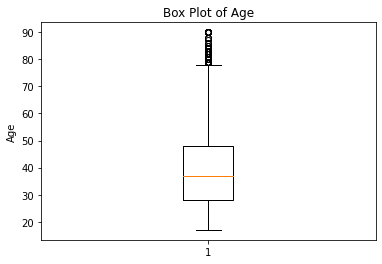

In [21]:
# Look at age data set and compute quantiles
age = replaced_df["age"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.set_ylabel('Age')
ax1.boxplot(age)
plt.show()

In [22]:
# Get quartile calculations
quartiles = age.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of age is: {lowerq}")
print(f"The upper quartile of age is: {upperq}")
print(f"The interquartile range of age is: {iqr}")
print(f"The the median of age is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of age is: 28.0
The upper quartile of age is: 48.0
The interquartile range of age is: 20.0
The the median of age is: 37.0 
Values below -2.0 could be outliers.
Values above 78.0 could be outliers.


In [23]:
# Create the bins in which Data will be held
# Bins are 0, 17, 22, 33, 40, 57, 65, 78, 99   
bins = [0, 17, 22, 33, 40, 57, 65, 78, 99]

# Create the names for the age bins
group_labels = ["< 18", "18-22", "23-33", "34-40", "41-57", "58-65", "66-78", "> 78"]

In [24]:
# Place the data series into a new column inside of the DataFrame
replaced_df["Age Category"] = pd.cut(replaced_df["age"], bins, labels=group_labels)

In [25]:
# Preview the dataset with the age categories
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category
0,90,NA,77053,HS-grad,9,Widowed,NA,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78
2,66,NA,186061,Some-college,10,Widowed,NA,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65


In [26]:
# Creating a group based off of the bins
age_group = replaced_df.groupby("Age Category")
age_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,age,education.num,capital.gain,capital.loss,hours.per.week
Age Category,,,,,
< 18,17.000000,6.649746,109.969543,41.857868,21.345178
18-22,20.127830,9.203497,172.293780,38.049871,31.973345
23-33,28.042877,10.205746,522.578680,64.451021,41.296036
34-40,36.921371,10.423555,1112.016465,96.743952,43.431788
41-57,47.793189,10.388900,1733.734512,116.752184,43.196386
58-65,60.970095,9.592207,1506.734481,91.636158,39.021749
66-78,70.087685,9.413793,1987.007882,121.714286,29.143842
> 78,83.887324,9.514085,1290.387324,135.007042,28.176056


In [27]:
# Age Category count
age_group[["age",]].count()

,age
Age Category,
< 18,394
18-22,3489
23-33,9259
34-40,5952
41-57,10072
58-65,2207
66-78,1015
> 78,142


## Hours Per Week

In [28]:
# Overview of hours.per.week
replaced_df["hours.per.week"].value_counts()

40    15201
50     2817
45     1823
60     1475
35     1295
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours.per.week, Length: 94, dtype: int64

In [29]:
# Overview of hours.per.week
replaced_df["hours.per.week"].min()

1

In [30]:
# Overview of hours.per.week
replaced_df["hours.per.week"].max()

99

In [31]:
# Overview of hours.per.week
replaced_df["hours.per.week"].median()

40.0

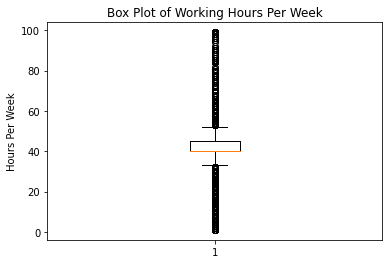

In [32]:
# Look at hours per week data set and compute quantiles
hours_per_week = replaced_df["hours.per.week"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Working Hours Per Week')
ax1.set_ylabel('Hours Per Week')
ax1.boxplot(hours_per_week)
plt.show()

In [33]:
# Get quartile calculations
quartiles = hours_per_week.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of hours per week is: {lowerq}")
print(f"The upper quartile of hours per week is: {upperq}")
print(f"The interquartile range of hours per week is: {iqr}")
print(f"The the median of hours per week is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of hours per week is: 40.0
The upper quartile of hours per week is: 45.0
The interquartile range of hours per week is: 5.0
The the median of hours per week is: 40.0 
Values below 32.5 could be outliers.
Values above 52.5 could be outliers.


### Group the working hours into categories

    less than 40
    between 40 and 45
    between 45 and 60
    between 60 and 80
    more than 80

In [34]:
# Create the bins in which Data will be held
# Bins are 0, 39, 45, 60, 80, 99   
bins = [0, 39, 45, 60, 80, 99]

# Create the names for the five bins
group_labels = ["< 40 hours", "40-45 hours", "46-60 hours", "61-80 hours", "> 80 hours"]

In [35]:
# Place the data series into a new column inside of the DataFrame
replaced_df["Hours Per Week"] = pd.cut(replaced_df["hours.per.week"], bins, labels=group_labels)

In [36]:
# Preview the dataset with the hours per week categories
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week
0,90,NA,77053,HS-grad,9,Widowed,NA,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours
2,66,NA,186061,Some-college,10,Widowed,NA,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22,40-45 hours
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33,< 40 hours
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40,40-45 hours
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65,40-45 hours


In [37]:
# Creating a group based off of the bins
work_hours_group = replaced_df.groupby("Hours Per Week")
work_hours_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,age,education.num,capital.gain,capital.loss,hours.per.week
Hours Per Week,,,,,
< 40 hours,36.794531,9.614214,575.181091,57.022443,25.399974
40-45 hours,38.705646,9.988607,783.465480,85.228035,40.617277
46-60 hours,40.219585,10.879834,2232.885975,124.618423,53.016929
61-80 hours,40.133038,10.639690,3574.199557,133.889135,70.328160
> 80 hours,41.721154,9.971154,629.716346,122.201923,92.543269


In [38]:
# Hours Per Week Category count
work_hours_group[["age",]].count()

,age
Hours Per Week,
< 40 hours,7753
40-45 hours,17642
46-60 hours,6025
61-80 hours,902
> 80 hours,208


## Native Country

In [39]:
# Overview of native.country
replaced_df["native.country"].value_counts()

United-States                 29146
Mexico                          639
NA                              582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [40]:
# Define the native regions
region = {
    "Cambodia": "Asia East", "China": "Asia East", "Hong": "Asia East", "Laos": "Asia East",
    "Thailand": "Asia East", "Japan": "Asia East", "Taiwan": "Asia East", "Vietnam": "Asia East",
    "Philippines": "Asia East","India": "Asia Central", "Iran": "Asia Central",
    "Cuba": "Central America", "Guatemala": "Central America", "Jamaica": "Central America", 
    "Nicaragua": "Central America", "Puerto-Rico": "Central America",  "Dominican-Republic": "Central America", 
    "El-Salvador": "Central America", "Haiti": "Central America", "Honduras": "Central America", 
    "Mexico": "Central America", "Trinadad&Tobago": "Central America",
    "Ecuador": "South America", "Peru": "South America", "Columbia": "South America",
    "England": "Europe West", "Germany": "Europe West", "Holand-Netherlands": "Europe West", 
    "Ireland": "Europe West", "France": "Europe West", "Greece": "Europe West", 
    "Italy": "Europe West", "Portugal": "Europe West", "Scotland": "Europe West",
    "Poland": "Europe East", "Yugoslavia": "Europe East", "Hungary": "Europe East",
    "South": "South Pacific", "Outlying-US(Guam-USVI-etc)":  "South Pacific",  
    "United-States": " United States"
}

In [41]:
# Add the native region to the dataset
replaced_df["Native Region"] = replaced_df["native.country"].replace(region)
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
0,90,NA,77053,HS-grad,9,Widowed,NA,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours,United States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours,United States
2,66,NA,186061,Some-college,10,Widowed,NA,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours,United States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22,40-45 hours,United States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33,< 40 hours,United States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40,40-45 hours,United States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65,40-45 hours,United States


In [42]:
# Creating a group based off of the regions
native_region_group = replaced_df.groupby("Native Region")
native_region_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,age,education.num,capital.gain,capital.loss,hours.per.week
Native Region,,,,,
United States,38.661772,10.170487,1090.126844,88.583476,40.454779
Asia Central,38.489510,12.419580,3135.748252,129.825175,42.265734
Asia East,37.922348,10.890152,1066.585227,105.727273,39.785985
Canada,42.545455,10.652893,1504.132231,129.933884,40.404959
Central America,35.613156,7.152702,405.983555,37.819107,39.414252
Europe East,43.258427,10.168539,628.415730,41.786517,39.056180
Europe West,41.259259,10.189815,737.289352,75.851852,41.930556
NA,38.740550,10.601375,1809.621993,118.469072,41.515464
South America,37.813559,9.389831,231.016949,29.237288,38.220339


In [43]:
# Native Region count
native_region_group[["age",]].count()

,age
Native Region,
United States,29146
Asia Central,143
Asia East,528
Canada,121
Central America,1277
Europe East,89
Europe West,432
NA,582
South America,118


## Work Class

In [44]:
# Overview of workclass
replaced_df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
NA                   1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: workclass, dtype: int64

## Education

In [45]:
# Overview of education
replaced_df["education"].value_counts()

HS-grad         10493
Some-college     7280
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1174
Assoc-acdm       1067
10th              931
7th-8th           644
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [46]:
# Overview of education.num
replaced_df["education.num"].value_counts()

9     10493
10     7280
13     5353
14     1722
11     1382
7      1174
12     1067
6       931
4       644
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education.num, dtype: int64

## Marital Status

In [47]:
# Overview of marital.status
replaced_df["marital.status"].value_counts()

Married-civ-spouse       14969
Never-married            10662
Divorced                  4440
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

## Occupation

In [48]:
# Overview of occupation
replaced_df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
NA                   1836
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

## Relationship

In [49]:
# Overview of relationship
replaced_df["relationship"].value_counts()

Husband           13187
Not-in-family      8291
Own-child          5059
Unmarried          3445
Wife               1567
Other-relative      981
Name: relationship, dtype: int64

## Race

In [50]:
# Overview of race
replaced_df["race"].value_counts()

White                 27790
Black                  3120
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

## Sex

In [51]:
# Overview of sex
replaced_df["sex"].value_counts()

Male      21770
Female    10760
Name: sex, dtype: int64

## Capital Gain and Capital Loss


In [52]:
# Overview of capital.gain
replaced_df["capital.gain"].value_counts()

0        29818
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital.gain, Length: 119, dtype: int64

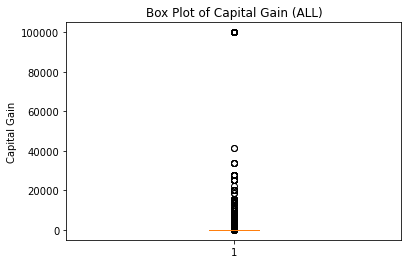

In [53]:
# Look at capital gain data set and compute quantiles
capital_gain_all = replaced_df["capital.gain"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Capital Gain (ALL)')
ax1.set_ylabel('Capital Gain')
ax1.boxplot(capital_gain_all)
plt.show()

In [54]:
# Get quartile calculations
quartiles = capital_gain_all.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capital gain is: {lowerq}")
print(f"The upper quartile of capital gain is: {upperq}")
print(f"The interquartile range of capital gain is: {iqr}")
print(f"The the median of capital gain is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capital gain is: 0.0
The upper quartile of capital gain is: 0.0
The interquartile range of capital gain is: 0.0
The the median of capital gain is: 0.0 
Values below 0.0 could be outliers.
Values above 0.0 could be outliers.


In [55]:
# Look at non-zero capital gain data set and compute quantiles
capital_gain_nonzero = replaced_df[(replaced_df["capital.gain"] != 0)]

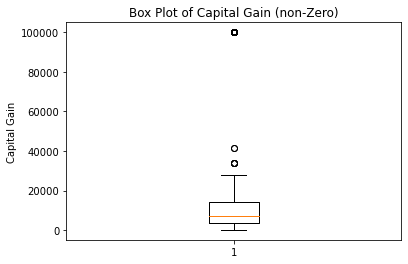

In [56]:
# Look at capital gain data set and compute quantiles
capital_gain = capital_gain_nonzero["capital.gain"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Capital Gain (non-Zero)')
ax1.set_ylabel('Capital Gain')
ax1.boxplot(capital_gain)
plt.show()

In [57]:
# Get quartile calculations
quartiles = capital_gain.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capital gain is: {lowerq}")
print(f"The upper quartile of capital gain is: {upperq}")
print(f"The interquartile range of capital gain is: {iqr}")
print(f"The the median of capital gain is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capital gain is: 3411.0
The upper quartile of capital gain is: 14084.0
The interquartile range of capital gain is: 10673.0
The the median of capital gain is: 7298.0 
Values below -12598.5 could be outliers.
Values above 30093.5 could be outliers.


In [58]:
# Overview of capital.loss
replaced_df["capital.loss"].value_counts()

0       31011
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital.loss, Length: 92, dtype: int64

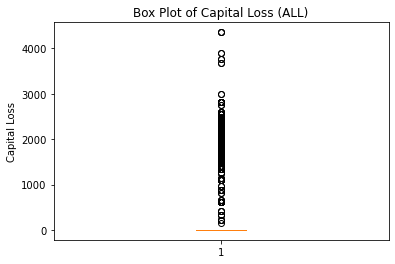

In [59]:
# Look at capital gain data set and compute quantiles
capital_loss_all = replaced_df["capital.loss"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Capital Loss (ALL)')
ax1.set_ylabel('Capital Loss')
ax1.boxplot(capital_loss_all)
plt.show()

In [60]:
# Get quartile calculations
quartiles = capital_loss_all.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capital loss is: {lowerq}")
print(f"The upper quartile of capital loss is: {upperq}")
print(f"The interquartile range of capital loss is: {iqr}")
print(f"The the median of capital loss is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capital loss is: 0.0
The upper quartile of capital loss is: 0.0
The interquartile range of capital loss is: 0.0
The the median of capital loss is: 0.0 
Values below 0.0 could be outliers.
Values above 0.0 could be outliers.


In [61]:
# Look at non-zero capital loss data set and compute quantiles
capital_loss_nonzero = replaced_df[(replaced_df["capital.loss"] != 0)]

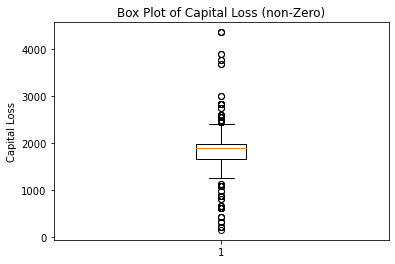

In [62]:
# Look at capital loss data set and compute quantiles
capital_loss = capital_loss_nonzero["capital.loss"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Capital Loss (non-Zero)')
ax1.set_ylabel('Capital Loss')
ax1.boxplot(capital_loss)
plt.show()

In [63]:
# Get quartile calculations
quartiles = capital_loss.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capital loss is: {lowerq}")
print(f"The upper quartile of capital loss is: {upperq}")
print(f"The interquartile range of capital loss is: {iqr}")
print(f"The the median of capital loss is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capital loss is: 1672.0
The upper quartile of capital loss is: 1977.0
The interquartile range of capital loss is: 305.0
The the median of capital loss is: 1887.0 
Values below 1214.5 could be outliers.
Values above 2434.5 could be outliers.


## Step 2:  Preliminary analysis to understand the impact of each predictor on income

In [64]:
# Preview the cleaned and transformed dataset
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
0,90,NA,77053,HS-grad,9,Widowed,NA,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours,United States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours,United States
2,66,NA,186061,Some-college,10,Widowed,NA,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours,United States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22,40-45 hours,United States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33,< 40 hours,United States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40,40-45 hours,United States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65,40-45 hours,United States


In [65]:
# Export the cleaned and transformed files as a CSV, without the Pandas index, but with the header
replaced_df.to_csv("replaced.csv", index=False, header=True)

## Age

In [66]:
# Creating a group based off of the age category
age_category_group = replaced_df.groupby(["Age Category", "income"], as_index=False)
age_category_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,Age Category,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,< 18,<=50K,17.000000,6.649746,109.969543,41.857868,21.345178
1,< 18,>50K,NaN,NaN,NaN,NaN,NaN
2,18-22,<=50K,20.120714,9.202247,71.911265,37.433593,31.901181
3,18-22,>50K,21.500000,9.444444,19529.388889,156.888889,45.888889
4,23-33,<=50K,27.777266,9.997759,123.877864,47.012824,40.543825
5,23-33,>50K,29.781581,11.567237,3132.493073,178.602282,46.220049
6,34-40,<=50K,36.833820,9.858394,175.702433,58.370560,42.088321
7,34-40,>50K,37.116721,11.684582,3201.186211,182.365364,46.429425
8,41-57,<=50K,47.736470,9.594187,157.873936,62.366469,41.574595
9,41-57,>50K,47.885046,11.675943,4285.849935,204.830169,45.822887


In [67]:
# Count the age category groups
age_category_group[["age"]].count()

,Age Category,income,age
0,< 18,<=50K,394.0
1,< 18,>50K,NaN
2,18-22,<=50K,3471.0
3,18-22,>50K,18.0
4,23-33,<=50K,8032.0
5,23-33,>50K,1227.0
6,34-40,<=50K,4110.0
7,34-40,>50K,1842.0
8,41-57,<=50K,6227.0
9,41-57,>50K,3845.0


## Hours Per Week

In [68]:
# Creating a group based off of the Hours Per Week category
hours_per_week_group = replaced_df.groupby(["Hours Per Week", "income"], as_index=False)
hours_per_week_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,Hours Per Week,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,< 40 hours,<=50K,35.574198,9.379187,125.821525,43.148396,25.096793
1,< 40 hours,>50K,48.394309,11.848238,4846.532520,188.901084,28.281843
2,40-45 hours,<=50K,37.041269,9.576437,145.760299,56.097034,40.510687
3,40-45 hours,>50K,44.166464,11.340937,2875.776025,180.806843,40.966998
4,46-60 hours,<=50K,37.801972,10.072195,202.638446,60.672079,52.897941
5,46-60 hours,>50K,43.456522,11.961180,4951.179348,210.236025,53.176242
6,61-80 hours,<=50K,38.595365,9.884135,164.311943,63.244207,70.344029
7,61-80 hours,>50K,42.662757,11.882698,9184.014663,250.111437,70.302053
8,> 80 hours,<=50K,41.462069,9.586207,224.958621,53.662069,92.655172
9,> 80 hours,>50K,42.317460,10.857143,1561.301587,279.952381,92.285714


In [69]:
# Count the Hours Per Week category groups
hours_per_week_group[["age"]].count()

,Hours Per Week,income,age
0,< 40 hours,<=50K,7015
1,< 40 hours,>50K,738
2,40-45 hours,<=50K,13521
3,40-45 hours,>50K,4121
4,46-60 hours,<=50K,3449
5,46-60 hours,>50K,2576
6,61-80 hours,<=50K,561
7,61-80 hours,>50K,341
8,> 80 hours,<=50K,145
9,> 80 hours,>50K,63


## Work Class

In [70]:
# Creating a group based off of the Hours Per Week category
workclass_group = replaced_df.groupby(["workclass", "income"], as_index=False)
workclass_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,workclass,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,Federal-gov,<=50K,40.624788,10.483871,173.207131,91.278438,40.093379
1,Federal-gov,>50K,45.711590,11.752022,1881.088949,145.592992,43.420485
2,Local-gov,<=50K,40.704607,10.580623,169.179539,79.185637,39.739837
3,Local-gov,>50K,44.254457,12.145867,2581.126418,183.220421,43.956240
4,NA,<=50K,39.258359,9.023100,159.157447,47.961702,31.428571
5,NA,>50K,55.617801,11.303665,4462.109948,170.989529,36.146597
6,Private,<=50K,35.117209,9.447550,137.621217,50.000226,38.806007
7,Private,>50K,42.816368,11.429147,3576.726466,187.517436,45.501512
8,Self-emp-inc,<=50K,43.206478,10.198381,177.941296,54.368421,47.135628
9,Self-emp-inc,>50K,48.249196,11.882637,8606.705788,235.172026,50.154341


In [71]:
# Count the workclass groups
workclass_group[["age"]].count()

,workclass,income,age
0,Federal-gov,<=50K,589
1,Federal-gov,>50K,371
2,Local-gov,<=50K,1476
3,Local-gov,>50K,617
4,NA,<=50K,1645
5,NA,>50K,191
6,Private,<=50K,17712
7,Private,>50K,4961
8,Self-emp-inc,<=50K,494
9,Self-emp-inc,>50K,622


## Native Region

In [72]:
# Creating a group based off of the native regions
native_region_group = replaced_df.groupby(["Native Region", "income"], as_index=False)
native_region_group[["age", "education.num", "capital.gain", "capital.loss",
                       "hours.per.week"]].mean()

,Native Region,income,age,education.num,capital.gain,capital.loss,hours.per.week
0,United States,<=50K,36.823088,9.710880,151.222778,54.026664,38.807117
1,United States,>50K,44.298368,11.579439,3968.393639,194.519459,45.505789
2,Asia Central,<=50K,36.435294,11.600000,148.176471,42.129412,39.176471
3,Asia Central,>50K,41.500000,13.620690,7514.086207,258.344828,46.793103
4,Asia East,<=50K,36.431579,10.194737,110.939474,66.671053,38.200000
5,Asia East,>50K,41.750000,12.675676,3520.270270,206.006757,43.858108
6,Canada,<=50K,41.012195,10.243902,110.695122,145.524390,37.914634
7,Canada,>50K,45.769231,11.512821,4433.923077,97.153846,45.641026
8,Central America,<=50K,35.020443,6.883305,119.210392,28.615843,39.058773
9,Central America,>50K,42.368932,10.223301,3674.640777,142.718447,43.466019


In [73]:
# Count the native region groups
native_region_group[["age"]].count()

,Native Region,income,age
0,United States,<=50K,21977
1,United States,>50K,7169
2,Asia Central,<=50K,85
3,Asia Central,>50K,58
4,Asia East,<=50K,380
5,Asia East,>50K,148
6,Canada,<=50K,82
7,Canada,>50K,39
8,Central America,<=50K,1174
9,Central America,>50K,103


In [74]:
over_50k = replaced_df[replaced_df["income"] == ">50K"]
over_50k.shape

(7839, 18)

In [75]:
under_50k = replaced_df[replaced_df["income"] == "<=50K"]
under_50k.shape

(24691, 18)

In [76]:
gender_over_50k = over_50k["sex"].value_counts()

In [77]:
gender_under_50k = replaced_df["sex"][replaced_df["income"] == "<=50K"].value_counts()

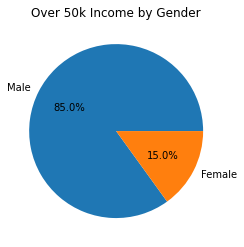

In [78]:
gender_over_50k.plot(kind="pie", autopct="%1.1f%%")
plt.title("Over 50k Income by Gender")
plt.ylabel("")
plt.show()

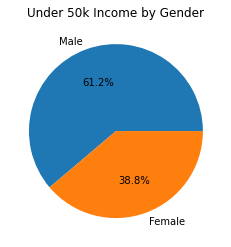

In [79]:
gender_under_50k.plot(kind="pie", autopct="%1.1f%%")
plt.title("Under 50k Income by Gender")
plt.ylabel("")
plt.show()

In [80]:
education_over_50k = replaced_df["education.num"][replaced_df["income"] == ">50K"]
education_under_50k = replaced_df["education.num"][replaced_df["income"] == "<=50K"]

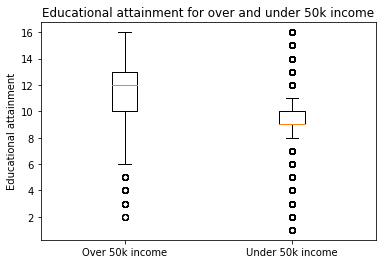

In [81]:
graph = [education_over_50k, education_under_50k]
labels = ["Over 50k income", "Under 50k income"]
fig1, ax1 = plt.subplots()
ax1.set_title("Educational attainment for over and under 50k income")
ax1.set_ylabel("Educational attainment")
ax1.boxplot(graph, labels=labels)
plt.show()

## Step 3:  Test multiple hypotheses and provide observations and insights to the following:

#### AGE

1. The older an individual is, the bigger their chances of having a higher income. And can this be explained by the fact that the older one gets, the more experienced professionally they become and this usually means a higher salary? 

#### WORK WEEK

2.	Do people who earn more than 50K tend to work for hours than those that earn less than 50K? Do men work more hours per week than women at all ages? At what age does the working hours per week decrease and by how much?

#### WORK CLASS

3.	Most people are employed in the private sector. Do people in the private sector earn more than the other work classes?


## Step 4:  Deliver results